In [ ]:
CST4050[MODELLING, REGRESSION AND MACHINE LEARNING] - CHALLENGE 2
M01032437 - KEERTHANA JOTHI

In [ ]:
#Introduction to the Regression Model

The regression model developed aims to predict house prices based on multiple 
influencing factors, such as the number of rooms, distance to key facilities, 
accessibility, and crime rates. Using a linear regression approach, the model 
attempts to establish a relationship between these features (independent variables) 
and house prices (dependent variable).

In [2]:
# Importing necessary libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seting visual style for seaborn
sns.set_style("whitegrid")

# Loading the dataset
data = pd.read_csv('house_data.csv')

# Displaying the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Rooms   Age  Distance  Accessibility  Tax  DisadvantagedPosition     Crime  \
0  5.565  70.6    2.0635             24  666                  17.16   8.79212   
1  6.879  77.7    3.2721              8  307                   9.93   0.62356   
2  5.972  76.7    3.1025              4  304                   9.97   0.34940   
3  6.943  97.4    1.8773              5  403                   4.59   1.22358   
4  5.926  71.0    2.9084             24  666                  18.13  15.57570   

   NitricOxides  PupilTeacher  Residential  NonRetail  Price  
0         0.584          20.2          0.0      18.10   11.7  
1         0.507          17.4          0.0       6.20   27.5  
2         0.544          18.4          0.0       9.90   20.3  
3         0.605          14.7          0.0      19.58   41.3  
4         0.580          20.2          0.0      18.10   19.1  


In [11]:
# Summarizing the dataset to understand numerical distributions
print("\nDataset summary statistics:")
print(data.describe())

# Checking for missing values
print("\nNumber of missing values in each column:")
print(data.isnull().sum())

# Dropping rows with missing values (if any)
data.dropna(inplace=True)


Dataset summary statistics:
            Rooms         Age    Distance  Accessibility         Tax  \
count  399.000000  399.000000  399.000000     399.000000  399.000000   
mean     6.313130   68.776441    3.765977       9.609023  410.451128   
std      0.709658   28.483255    2.149947       8.782264  170.424454   
min      3.561000    2.900000    1.129600       1.000000  187.000000   
25%      5.888500   45.500000    2.058100       4.000000  277.000000   
50%      6.240000   77.700000    3.102500       5.000000  334.000000   
75%      6.642000   94.500000    5.116700      24.000000  666.000000   
max      8.780000  100.000000   12.126500      24.000000  711.000000   

       DisadvantagedPosition       Crime  NitricOxides  PupilTeacher  \
count             399.000000  399.000000    399.000000    399.000000   
mean               12.489975    3.975191      0.555370     18.483960   
std                 7.143052    9.431691      0.116655      2.178329   
min                 1.730000    0.

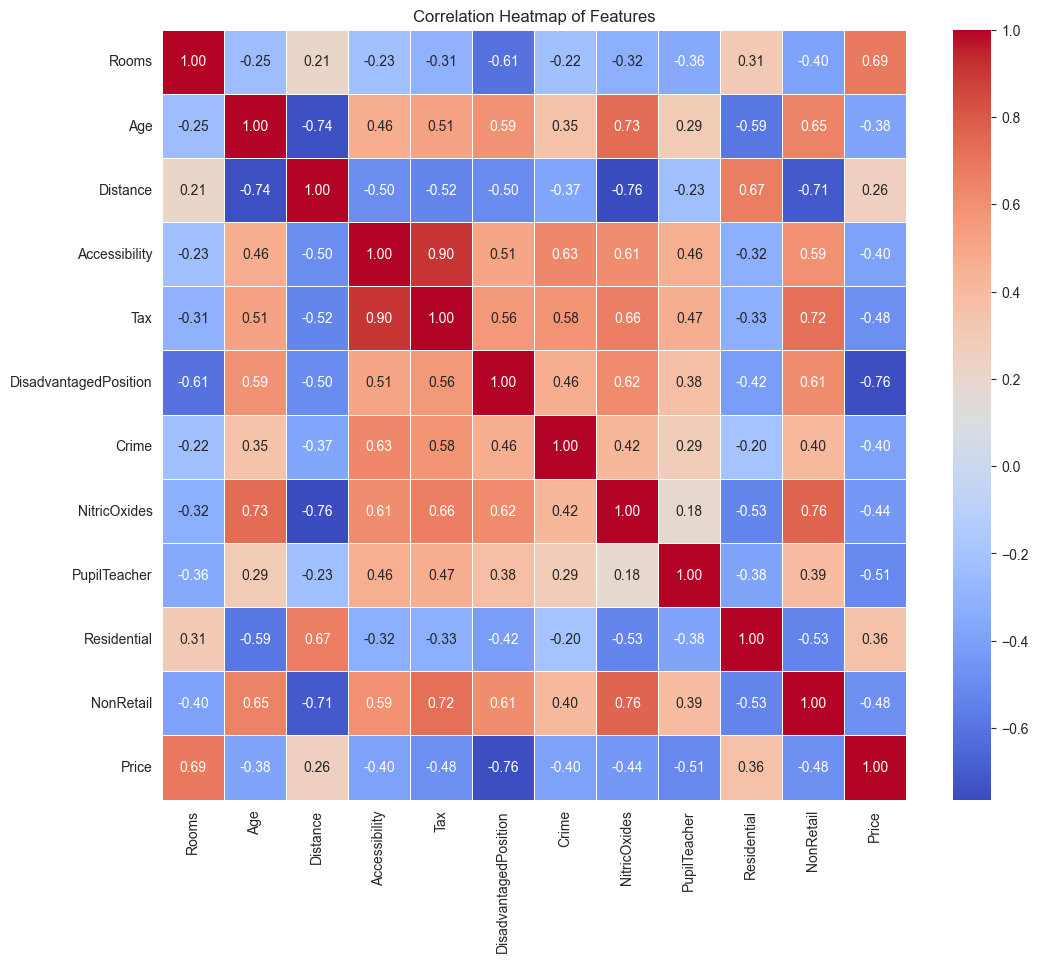

In [14]:
# Visualization 1: Correlation Heatmap
# Purpose: To identify relationships between features and detect 
#          multicollinearity

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# **Explanation**:
# - Strong correlations (close to 1 or -1) indicate that two features are 
#   closely related.
# - Multicollinearity among independent variables can bias the regression model.
# - Highlighting the pairs of features with high correlation that might need 
#   attention.

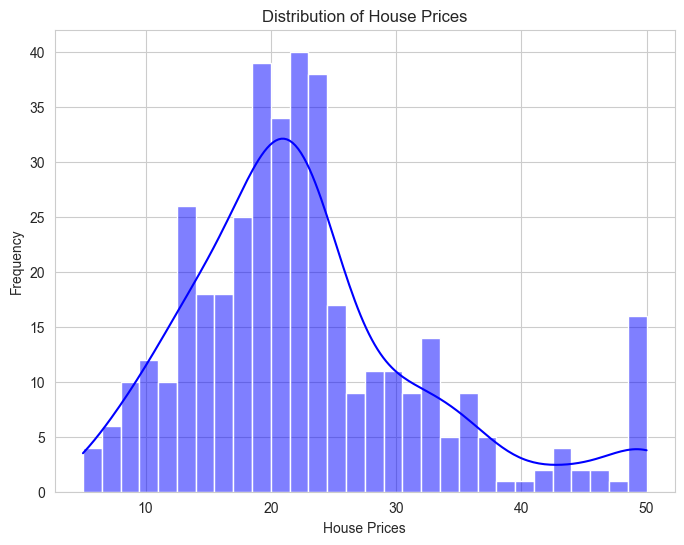

In [13]:
# Visualization 2: Distribution of House Prices
# Purpose: To examine the spread and skewness of the target variable (Price)

plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.show()

# **Explanation**:
# - Shows whether house prices are normally distributed or skewed.
# - Skewed distributions might require transformations to improve model 
#   performance.

In [4]:
# Splitting data into independent (X) and dependent (y) variables
X = data.drop('Price', axis=1)  # Independent variables
y = data['Price']              # Target variable

# Standardizing the independent variables
scaler = StandardScaler()      # Create a scaler object
X_scaled = scaler.fit_transform(X)  # Fit and transform the data

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Displaying coefficients of the trained model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients (Feature Importance):")
print(coefficients)


Model Coefficients (Feature Importance):
                  Feature  Coefficient
0                   Rooms     2.481100
1                     Age     0.075701
2                Distance    -2.973362
3           Accessibility     2.328362
4                     Tax    -1.909446
5   DisadvantagedPosition    -4.583561
6                   Crime    -1.163496
7            NitricOxides    -1.934286
8            PupilTeacher    -2.376935
9             Residential     0.975807
10              NonRetail     0.509308


In [12]:
# Identifying the most influential variable
most_influential = coefficients.loc[coefficients['Coefficient'].abs().idxmax()]
print(f"Most influential variable: {most_influential['Feature']} (Coefficient: 
{most_influential['Coefficient']})")

Most influential variable: DisadvantagedPosition (Coefficient: -4.5835605190555)


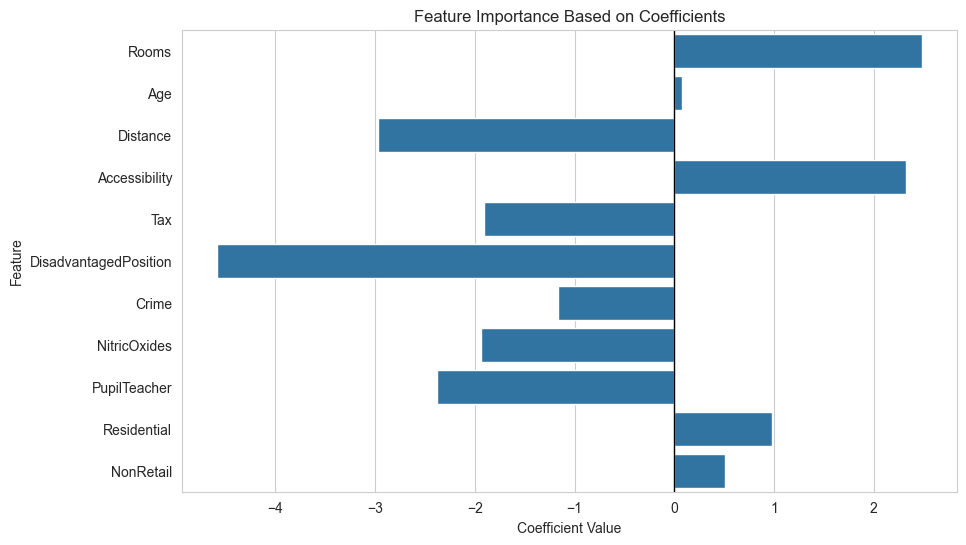

In [14]:
# Visualization 4: Feature Importance Bar Plot
# Purpose: To understand the influence of each feature on house prices

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
coefficients['Dummy_Hue'] = 'All Features'  # Adding a dummy column to rectify warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.title('Feature Importance Based on Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=1)
plt.show()

# **Explanation**:
# - Positive coefficients indicate features that increase house prices.
# - Negative coefficients indicate features that decrease house prices.
# - Features with larger absolute values have a greater impact.

In [5]:
# Model Evaluation: Predictions on the test set
y_pred = model.predict(X_test)

# Calculating performance metrics
r2 = r2_score(y_test, y_pred)  # R-squared score
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error

print(f"\nModel Performance Metrics:\nR-squared: {r2:.4f}
\nMean Squared Error: {mse:.4f}")


Model Performance Metrics:
R-squared: 0.7489
Mean Squared Error: 20.3916


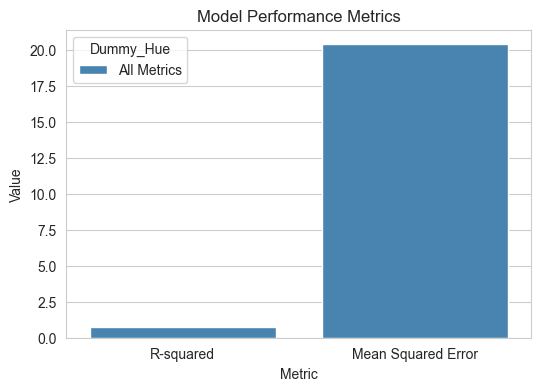

In [15]:
#Visulization 4: 

metrics = pd.DataFrame({
    'Metric': ['R-squared', 'Mean Squared Error'],
    'Value': [r2, mse]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Metric', y='Value', data=metrics)
metrics['Dummy_Hue'] = 'All Metrics'  # Adding a dummy column to rectify warnings
sns.barplot(x='Metric', y='Value', data=metrics, hue='Dummy_Hue', palette='Blues_d', dodge=False)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


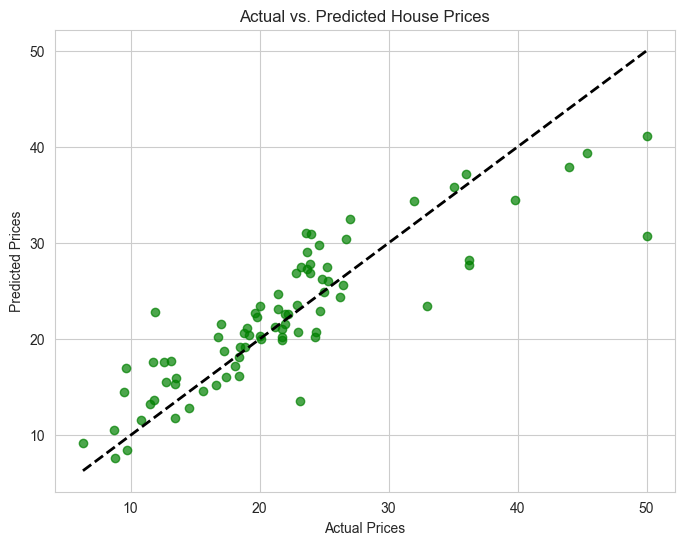

In [7]:
# Visualization 5: Actual vs. Predicted Prices
# Purpose: To compare model predictions with actual house prices

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
'k--', lw=2)
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# **Explanation**:
# - Points closer to the diagonal line represent better predictions.
# - Large deviations from the line indicate prediction errors.

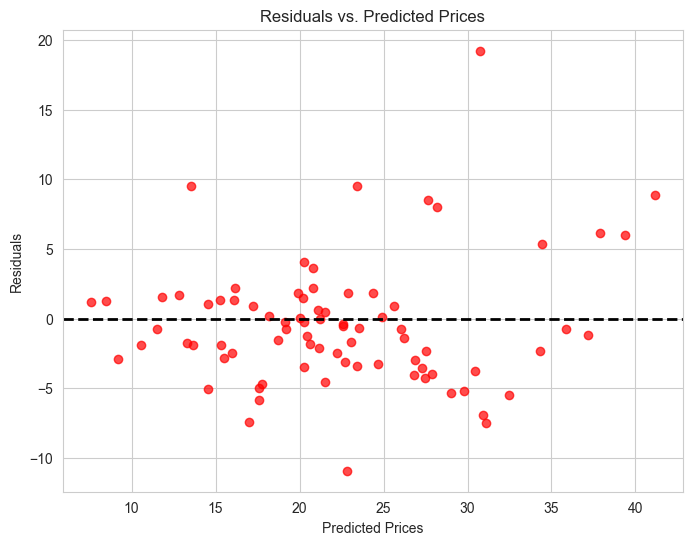


Analysis Complete.


In [11]:
# Visualization 6: Residual Plot
# Purpose: To check for patterns in residuals and validate model assumptions

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# **Explanation**:
# - Residuals should be randomly scattered around 0 for a good linear fit.
# - Patterns or trends in residuals indicate issues like non-linearity 
#   or heteroscedasticity.

# End of analysis
print("\nAnalysis Complete.")

In [ ]:
Discussion of the Results Generated by the Regression Model:

The results from the regression model provide insight into how well the model 
predicts house prices and the relative importance of the features in 
determining prices. Here's a structured discussion:

Model Performance Metrics:

R-squared :
This is the measure showing the proportion of variance in house prices explained 
by this model. The higher the R², the closer the value to 1; hence, the model 
would be a good fit. If R² is low, then some factors affecting house prices 
have not been captured in the data, or the model may be inappropriate for the data.

Mean Squared Error:
This metric defines the average squared difference between real and predicted 
prices. A lower value of MSE denotes better accuracy in the prediction.

Compare this value to the scale of the house prices. If it's high compared
to the target range, the model certainly needs refinement.

Feature Importance:

Coefficients of the model describe dependence of house prices from features 
values: 

Positive Coefficients: Features with positive coefficients are those that 
increase the prices of houses. Example: the number of rooms, accessibility to 
facilities, etc., can have a positive influence.

Negative Coefficients: Features with negative coefficients decrease house 
prices. Some variables, such as a high crime rate or longer distances
from the city, would reduce the desirability of the property.By ranking
coefficients, we identify the most impactful features:

High absolute coefficient values indicate features that strongly influence 
prices, either positively or negatively.


Visual Analysis:

Correlation Heatmap:
The heatmap shows the relationship between features. Strong correlations 
    among independent variables (multicollinearity) can result in biased estimates
    of regression coefficients and, therefore, feature reduction or 
    transformation is necessary.

VIF Analysis:
High VIF values indicate multicollinearity. Features with VIF > 5 should be 
reconsidered for inclusion in the model.

Actual vs. Predicted Plot:
This scatter plot is showing the comparison between the actual and predicted
prices. Points lying close to the diagonal line imply very good 
predictions. Any remarkable deviation suggests scope for enhancement.

Residual Plot:
The Residuals (Actual-Predicted) are randomly scattered around zero. There are 
patterns or a flow within the residual plot which depicts that the model 
assumptions-linear or homoscedastic-are not fully met.

Summary:

The regression model serves as a baseline for house price prediction with 
interpretable insights into the factors that drive it. While the performance 
metrics reflect its current effectiveness, there is scope for refinement 
through advanced feature engineering and alternative modeling techniques.